In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import tensorflow as tf
from tensorflow import keras as k

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print('train set shape:', train_images.shape, 'test set shape:', test_images.shape)

train set shape: (60000, 28, 28) test set shape: (10000, 28, 28)


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

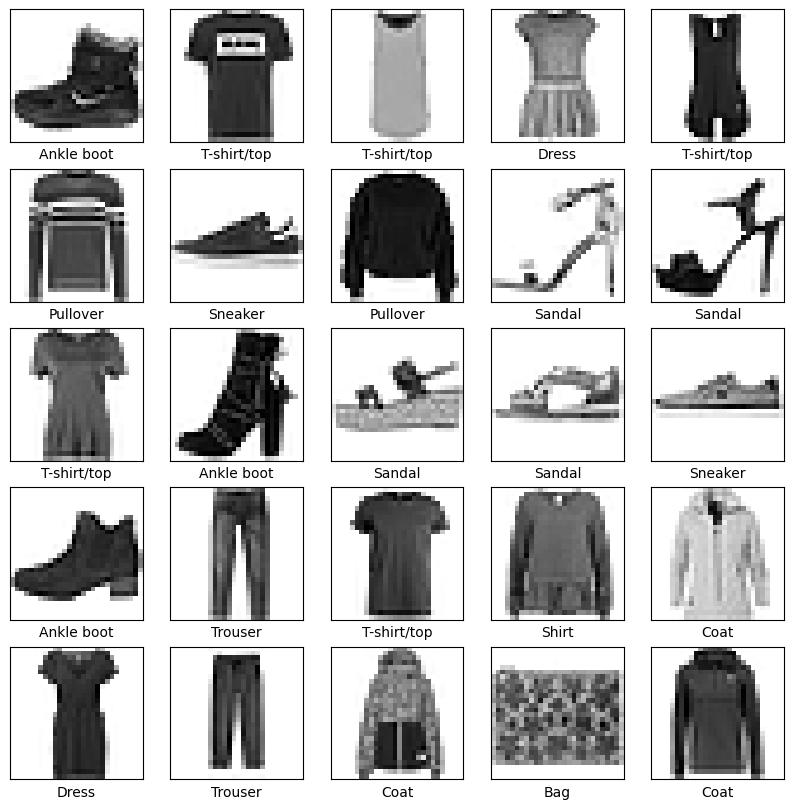

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
# Min-Max scale to (0, 1)
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [8]:
print(train_labels.shape)

(60000, 10)


In [11]:
model=tf.keras.Sequential([
    # 32 filters 3x3, same padding, stride=1
    tf.keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu", input_shape=(28, 28 , 1)),
    # 64 filters 3x3, same padding, stride=1
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10)   
])


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dropout_2 (Dropout)         (None, 12544)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               1605760   
                                                      

In [ ]:
model.compile(optimizer='nadam',
              loss=k.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history=model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=15, batch_size=64)

Epoch 1/15
938/938 [==============================] - 33s 15ms/step - loss: 0.4585 - accuracy: 0.8391 - val_loss: 0.2921 - val_accuracy: 0.8918
Epoch 2/15
938/938 [==============================] - 13s 13ms/step - loss: 0.3006 - accuracy: 0.8931 - val_loss: 0.2496 - val_accuracy: 0.9075
Epoch 3/15
938/938 [==============================] - 13s 14ms/step - loss: 0.2539 - accuracy: 0.9082 - val_loss: 0.2397 - val_accuracy: 0.9130
Epoch 4/15
938/938 [==============================] - 13s 14ms/step - loss: 0.2231 - accuracy: 0.9186 - val_loss: 0.2116 - val_accuracy: 0.9248
Epoch 5/15
938/938 [==============================] - 13s 14ms/step - loss: 0.2002 - accuracy: 0.9262 - val_loss: 0.2105 - val_accuracy: 0.9247
Epoch 6/15
938/938 [==============================] - 13s 14ms/step - loss: 0.1812 - accuracy: 0.9331 - val_loss: 0.2141 - val_accuracy: 0.9261
Epoch 7/15
938/938 [==============================] - 13s 14ms/step - loss: 0.1661 - accuracy: 0.9384 - val_loss: 0.2046 - val_accuracy:

<Axes: >

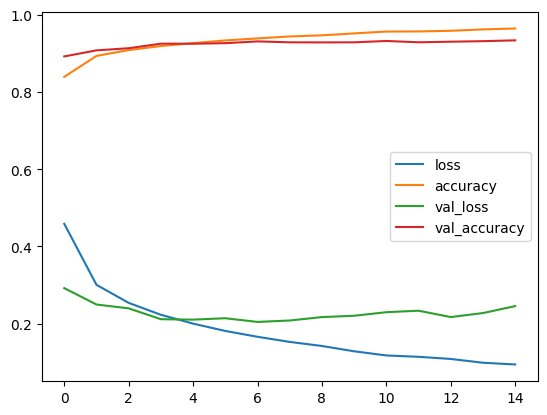

In [ ]:
import pandas as pd 
hist_df = pd.DataFrame(history.history)
hist_df.plot()

In [ ]:
model.save('tests\\fashion_mnist.h5')

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
def plot_image(prediction, image):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(image[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(prediction)
  
  plt.xlabel("{} {:2.0f}%".format(class_names[predicted_label],
                                100*np.max(prediction),),
                                color='blue')

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

1/1 [==============================] - 0s 42ms/step
tshirt.png --> [[9.9999976e-01 2.1348632e-17 3.9495254e-16 9.7671940e-12 7.3267324e-18
  1.4628679e-20 2.3630606e-07 6.0264731e-29 1.3072725e-10 6.8230785e-30]] (0)
1/1 [==============================] - 0s 40ms/step
pants.png --> [[1.07342516e-04 9.92718220e-01 6.34316962e-07 1.86737848e-03
  4.66298452e-03 2.95757441e-09 6.35238132e-04 5.89757973e-12
  8.15583280e-06 1.38435671e-12]] (1)
1/1 [==============================] - 0s 41ms/step
pyjamas.jpg --> [[7.45129380e-09 9.99999881e-01 6.89352186e-11 1.52201629e-08
  8.36273495e-10 1.09277075e-11 3.38800490e-08 2.41742339e-14
  1.19593750e-07 9.73863568e-13]] (1)
1/1 [==============================] - 0s 48ms/step
ankle boot.jpg --> [[2.3896252e-13 1.2688094e-15 2.3123489e-16 9.1431665e-19 6.8317116e-19
  6.8195506e-12 1.7643180e-15 9.3043823e-08 3.8412775e-17 9.9999988e-01]] (9)
1/1 [==============================] - 0s 68ms/step
heels.jpg --> [[5.2415694e-06 1.5655509e-07 2.904067

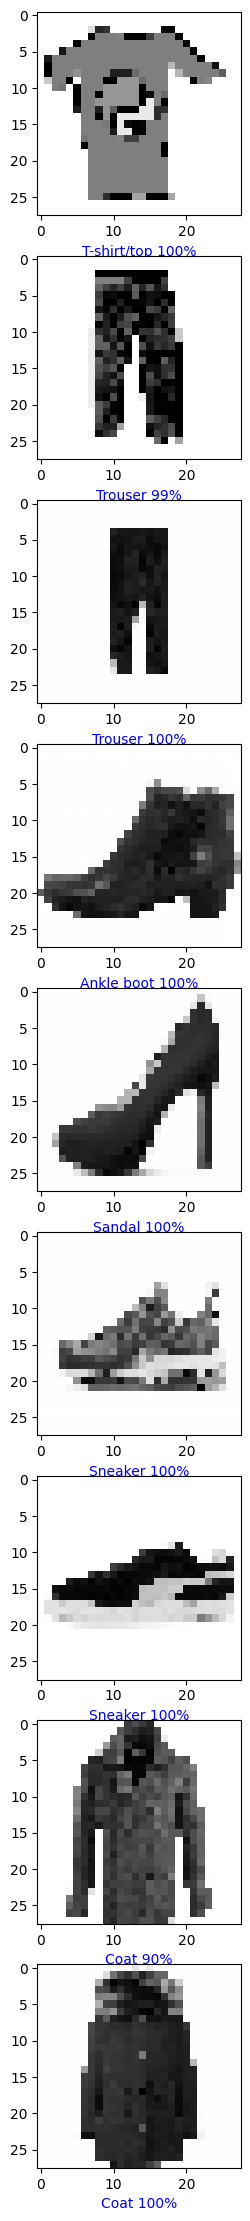

In [ ]:
internet_images = ['tshirt.png', 'pants.png', 'pyjamas.jpg', 'ankle boot.jpg', 'heels.jpg', 'sneakers.jpg', 'sneakers2.jpg', 'coat.jpg', 'coat2.jpg']

figure, ax = plt.subplots(len(internet_images), 1, figsize=(28, 28))
for index, image in enumerate(internet_images):

    image_data = cv2.imread('tests/'+image, cv2.IMREAD_GRAYSCALE)
    # resize image to match model input dimensions
    image_data = cv2.resize(image_data, (28, 28))

    ax[index].imshow(image_data, cmap='grey')
    image_data = (255 - image_data) / 255.0
    image_data = np.expand_dims(image_data,0)
    prediction = probability_model.predict(image_data)
    predicted_class_index = np.argmax(prediction)
    class_name = class_names[predicted_class_index]
  
    ax[index].set_xlabel("{} {:2.0f}%".format(class_name,
                                100*np.max(prediction),),
                                color='blue')
    
    print(image, '-->', prediction, f'({predicted_class_index})')